# WASP-29

In [2]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [3]:
name = 'HD-134004'

In [4]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [5]:
len(fnames)

152

In [6]:
obs = om.Observation.from_files(fnames)

In [7]:
obs

HD-134004 [4 Visits]

In [12]:
obs.fit_transit(fit_inc=True, fit_t0=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

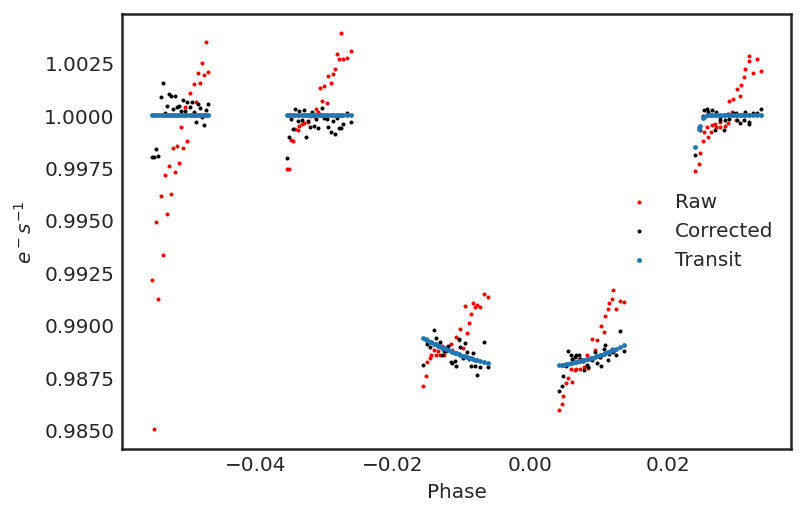

In [13]:
obs.plot()

In [14]:
obs.fit_model()

Fitting Transit/Eclipse Model: 100%|██████████████| 4/4 [00:38<00:00,  9.61s/it]


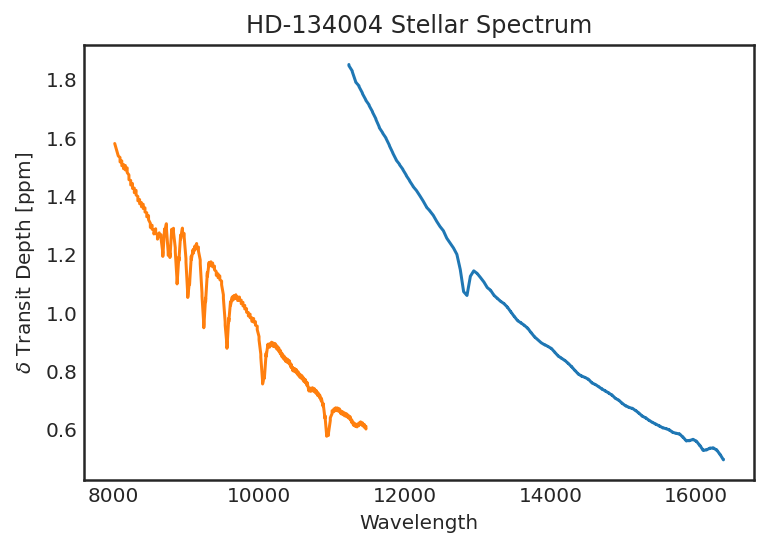

In [15]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

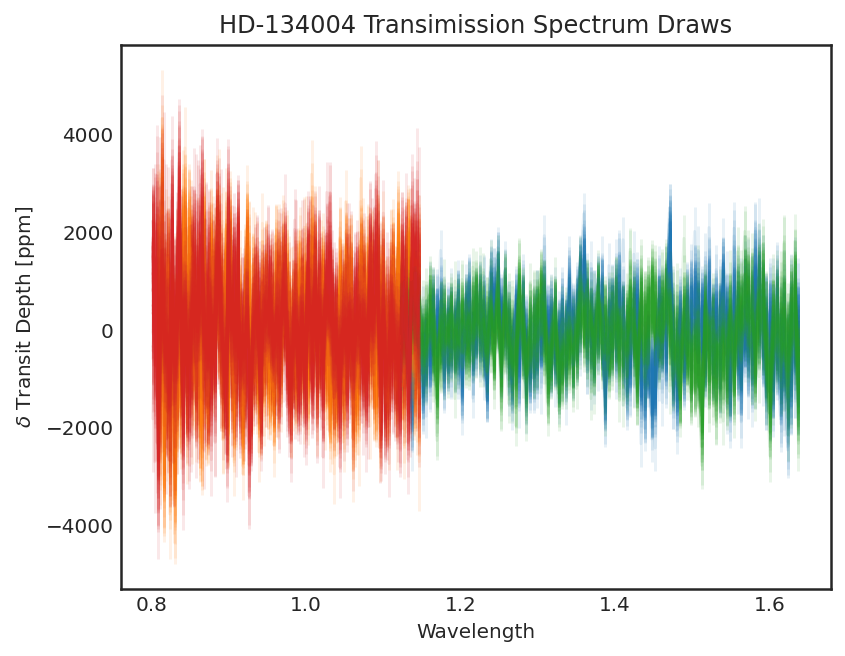

In [16]:
obs.plot_spectra()

[Text(0.5, 1.0, 'WASP-107 Transmission Spectrum')]

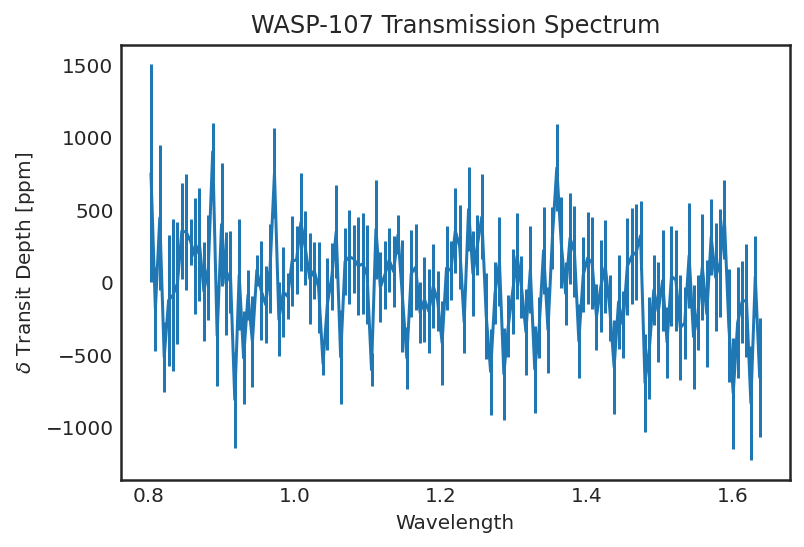

In [17]:
ax = om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 150)).plot()
ax.set(title='WASP-107 Transmission Spectrum')

In [18]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

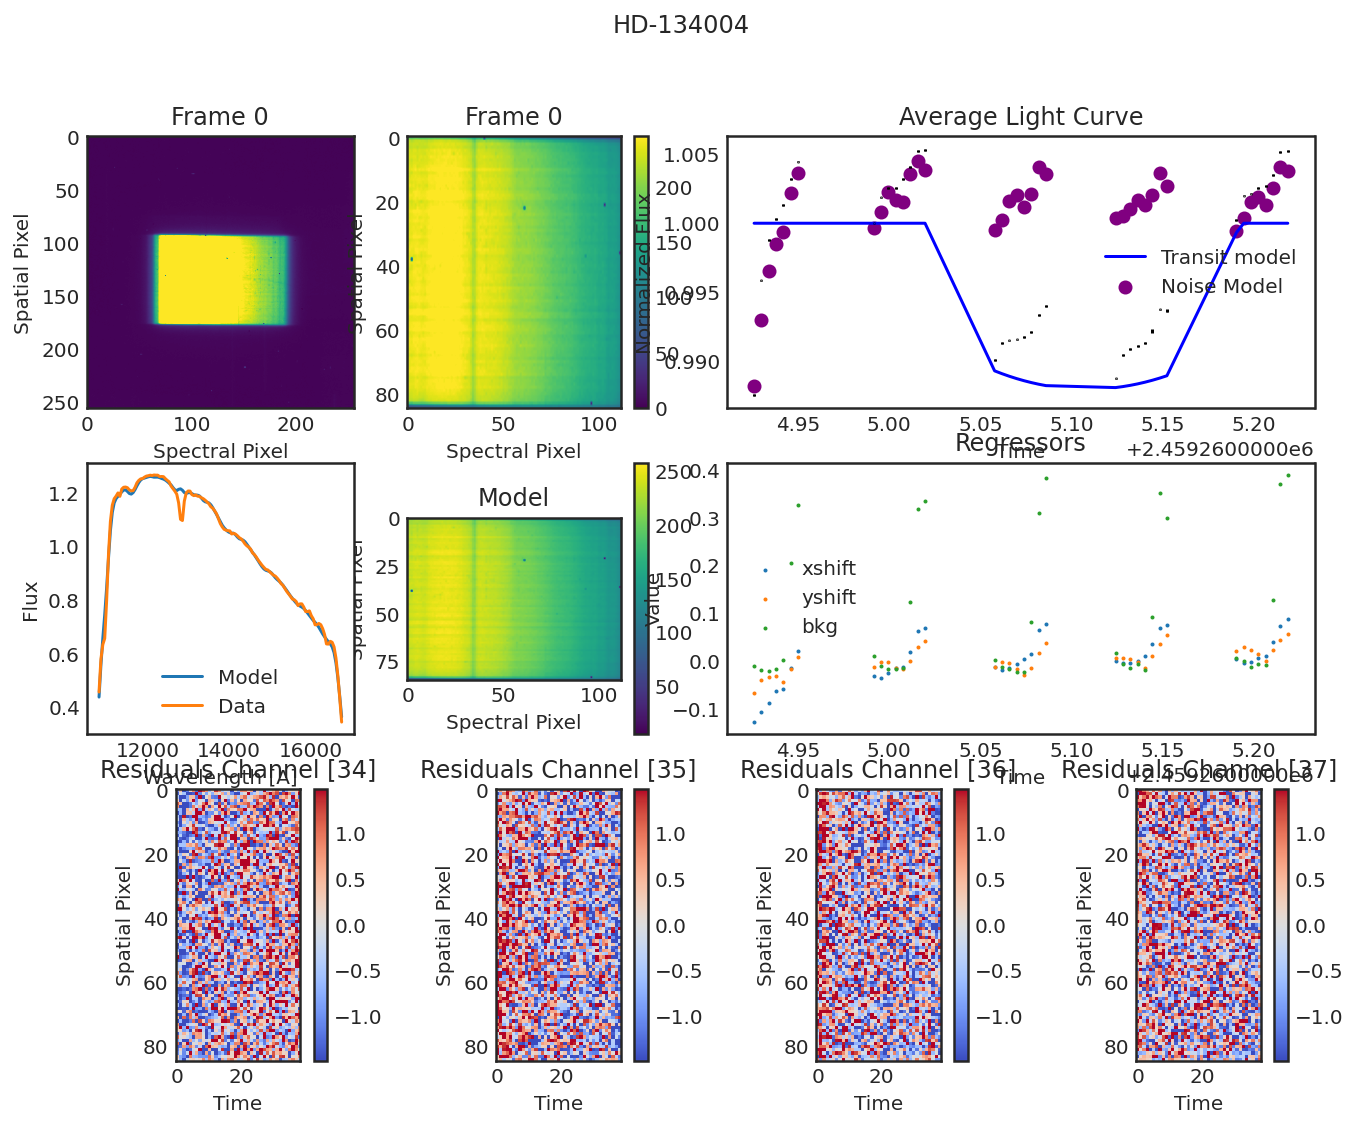

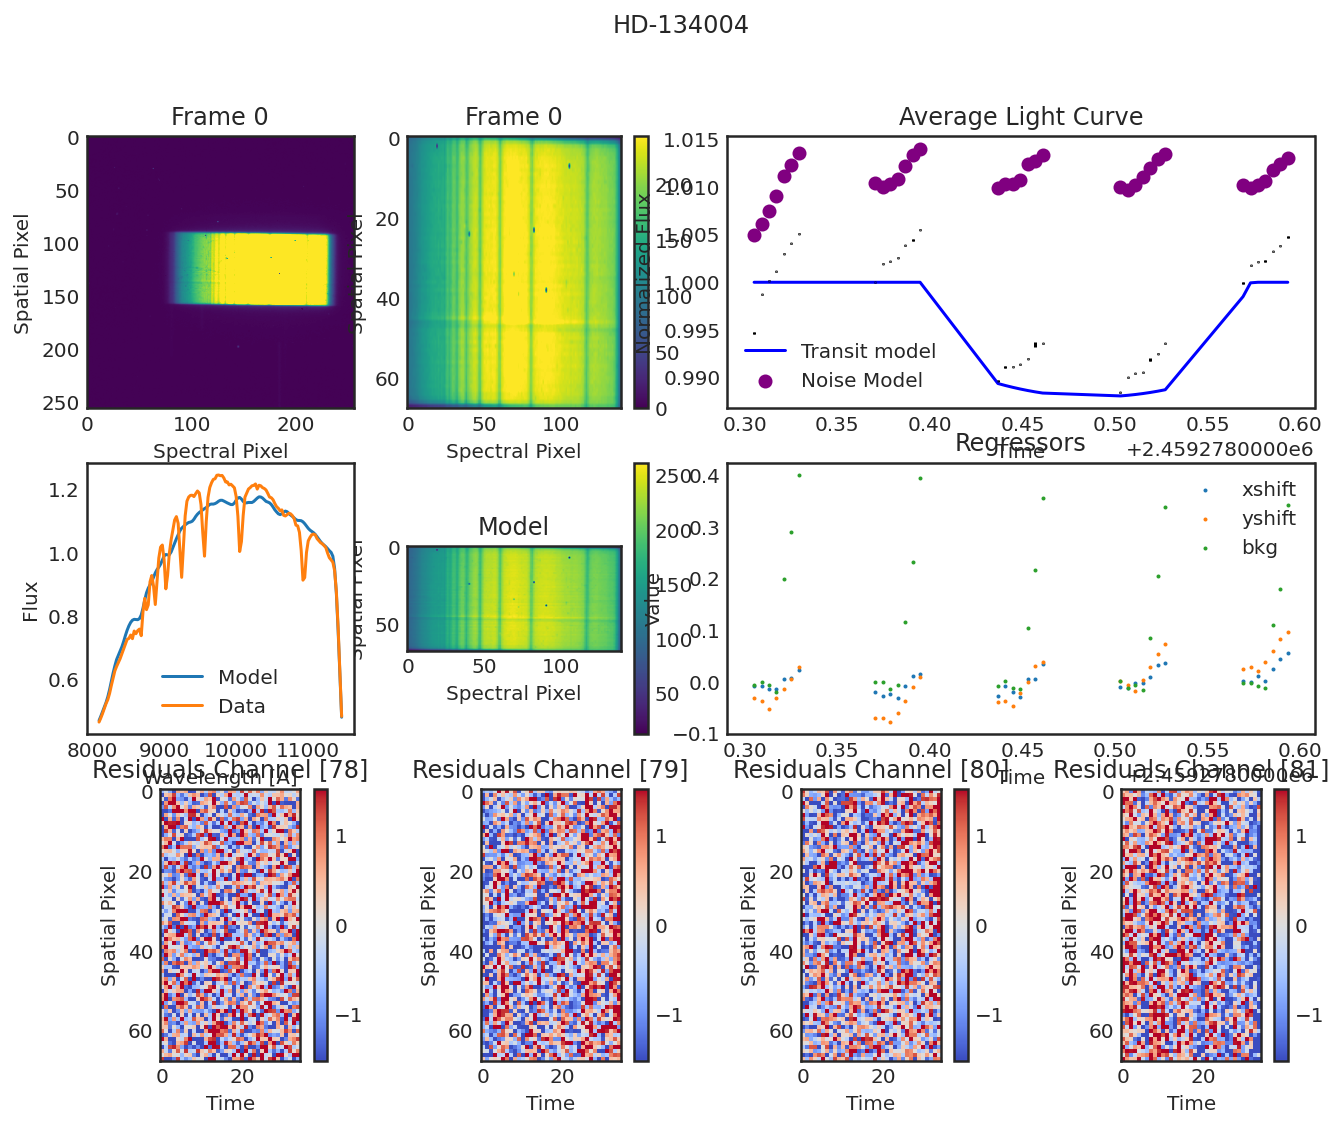

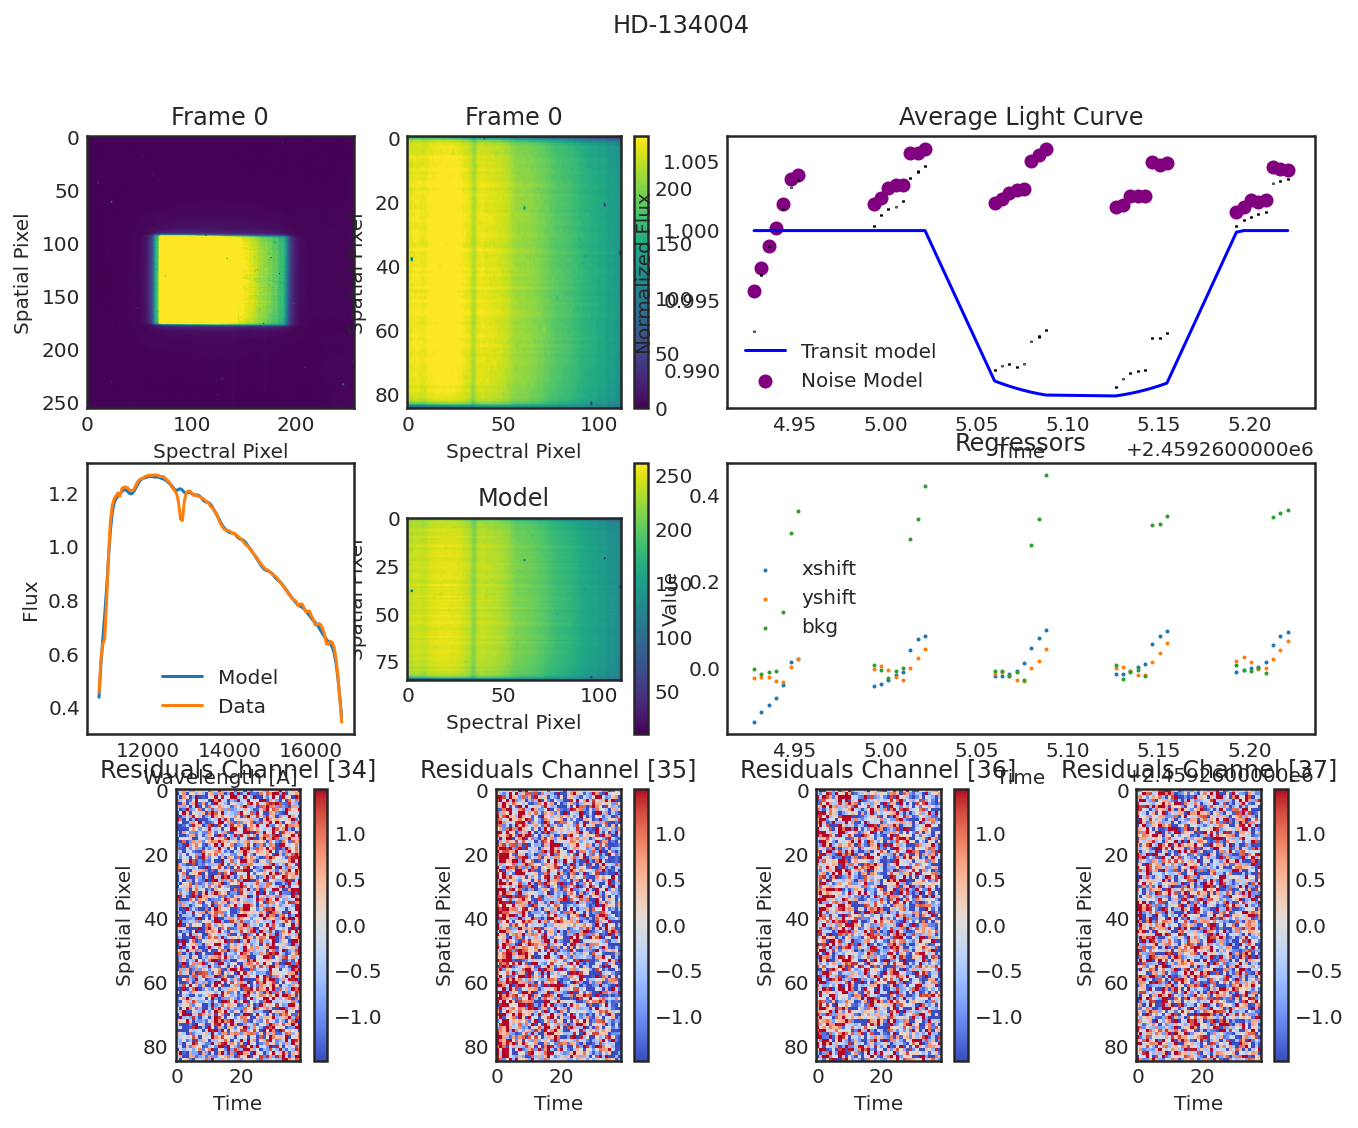

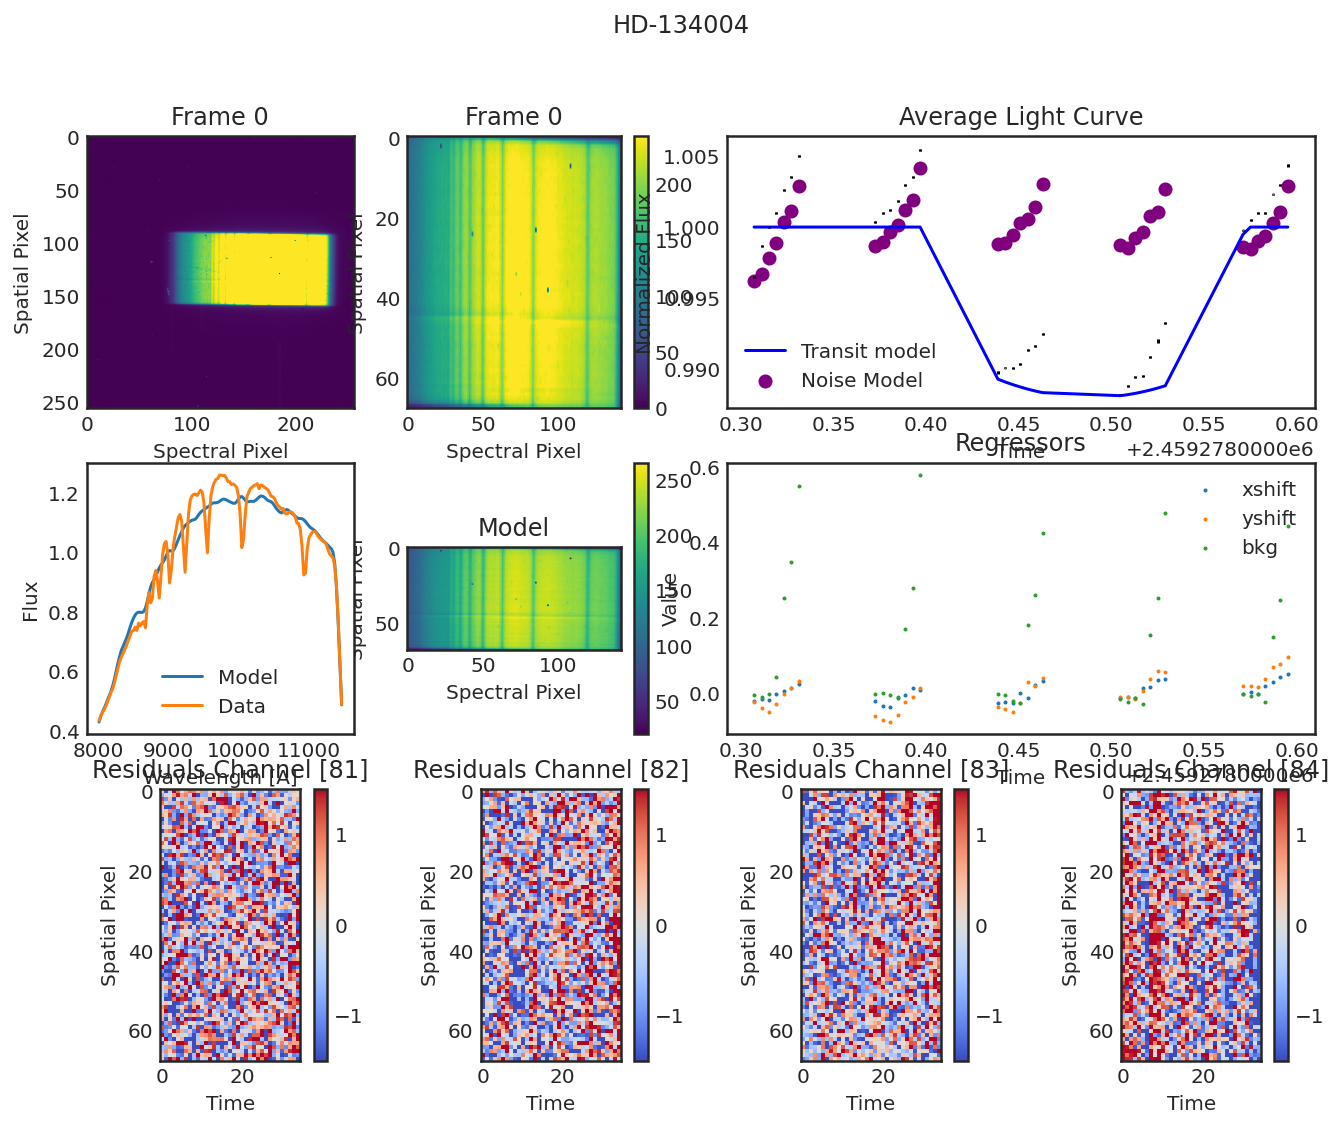

In [19]:
for visit in obs:
    visit.diagnose();
    plt.show();